<a href="https://colab.research.google.com/github/Binodinibehera754/Regression-Model/blob/main/laptop_prices_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
asinow_laptop_price_dataset_path = kagglehub.dataset_download('asinow/laptop-price-dataset')

print('Data source import complete.')

****

# Dataset Overview:

This dataset contains various features related to laptops, including Brand, TypeName, RAM, Memory, Battery, DisplaySize, and more. The target variable for predicting laptop prices is Price.

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.spatial import distance

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/laptop-price-dataset/laptop_prices.csv


# 1. Data Preprocessing Steps:

Loading the Dataset: The dataset is read from a CSV file and loaded into a Pandas DataFrame using:

In [ ]:
df = pd.read_csv("/kaggle/input/laptop-price-dataset/laptop_prices.csv")

df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


In [ ]:
df.head()

# 2.Handling Missing Values:

* Check for any missing values in the dataset

* If any missing values exist, they can be handled by either filling them with appropriate values or dropping the rows/columns.

In [ ]:
df.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

# 3. Summary Statistics:


* Display summary statistics (mean, standard deviation, min, max, etc.) of the dataset:

In [ ]:
df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


# 4. Data Preprocessing Steps:

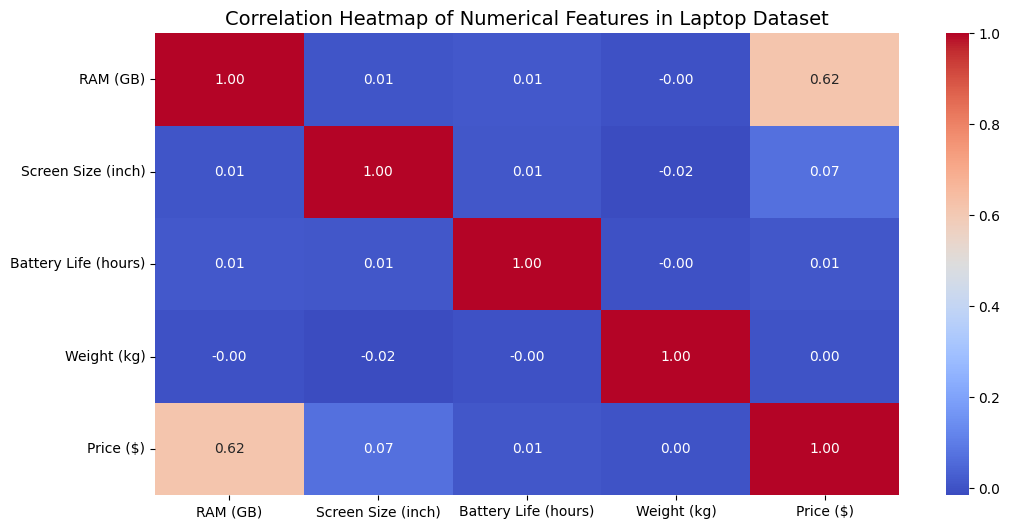

In [ ]:
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(12, 6))

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Numerical Features in Laptop Dataset", fontsize=14)

plt.show()

# 5. Splitting the Dataset:

The dataset can be split into training and testing sets, typically with an 80-20 ratio:

In [ ]:
X = df.drop(columns=["Price ($)"])

y = df["Price ($)"]

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")

In [ ]:
scaler = StandardScaler()

X_train_scaled = preprocessor.fit_transform(X_train)

X_test_scaled = preprocessor.transform(X_test)

# 6. Model Training and Evaluation:

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"📌 {name} Performance:")
    print(f"   - RMSE: {rmse:.2f}")
    print(f"   - R² Score: {r2:.2f}")
    print("-" * 40)

# Output:
This code evaluates and displays the performance of four regression models:


1. Linear Regression
2. Random Forest Regressor
3. KNN Regressor
4. Decision Tree Regressor

For each model, it calculates the Root Mean Squared Error (RMSE) and the R-squared (R²) Score, printing them for comparison.

# 7. Model Evaluation with Additional Metrics:

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n📌 {name} Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print("-" * 40)# 4. Final Model Selection and Prediction:

**Output:**

For each model, this code calculates and prints:


* Mean Absolute Error (MAE): The average magnitude of errors in predictions.

* Root Mean Squared Error (RMSE): The square root of the average squared differences between the predicted and actual values.

* R-squared (R²) Score: A statistical measure that explains the proportion of the variance in the dependent variable that is predictable from the independent variables


# 8. Actual vs Predicted Price Comparison:

In [ ]:
best_model = models["Random Forest"]

predicted_prices = best_model.predict(X_test_scaled)

actual_values = y_test.values[:10]
predicted_values = predicted_prices[:10]

comparison_df = pd.DataFrame({"Actual Price": actual_values, "Predicted Price": predicted_values})
print("\nActual vs Predicted Prices:")
print(comparison_df)

sample_instance = X_test_scaled[0].reshape(1, -1)
predicted_price = best_model.predict(sample_instance)

print(f"\nPredicted Price for the Given Features: ${predicted_price[0]:.2f}")

**Output:**


1. Actual vs Predicted Prices (for first 10 instances): The code prints a DataFrame that compares the Actual Price from the test set with the Predicted Price for the first 10 test samples.

2. Predicted Price for a Single Instance: The code predicts the price for the first sample instance from the test set and prints the predicted pric


# 9. Price Prediction Using Euclidean Distance:

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/laptop-price-dataset/laptop_prices.csv")

# Define the actual feature values for the laptop
numeric_cols = ["RAM (GB)", "Storage", "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)", "Resolution"]

# Define the actual feature values for the laptop
actual_values = np.array([numeric_cols == ["RAM (GB)", "Storage", "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)", "Resolution"]
]).reshape(1, -1)

# Keep only numeric columns (excluding 'Price ($)' before computing distances)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("Price ($)")  # Ensure 'Price ($)' is not included

# Compute the Euclidean distance between the actual values and all rows in the dataset
df["distance"] = np.linalg.norm(df[numeric_cols].values - actual_values, axis=1)

# Find the row with the smallest distance (the closest match)
closest_row = df.loc[df["distance"].idxmin()]

# Get the actual price for the closest match
actual_price = closest_row["Price ($)"]
print(f"\nActual Price for the Given Features: ${actual_price:.2f}")

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/laptop-price-dataset/laptop_prices.csv")

# Define the actual feature values for the laptop
actual_values = np.array([numeric_cols == ["RAM (GB)", "Storage", "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)", "Resolution"]
]).reshape(1, -1)

# Keep only numeric columns (excluding 'Price ($)' before computing distances)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("Price ($)")  # Ensure 'Price ($)' is not included

# Compute the Euclidean distance between the actual values and all rows in the dataset
df["distance"] = np.linalg.norm(df[numeric_cols].values - actual_values, axis=1)

# Find the row with the smallest distance (the closest match)
closest_row = df.loc[df["distance"].idxmin()]

# Get the actual price for the closest match
actual_price = closest_row["Price ($)"]
print(f"\nActual Price for the Given Features: ${actual_price:.2f}")


**Explanation of Output:**

* Euclidean Distance Calculation: The code computes the Euclidean distance between the given laptop's feature values (actual_values) and all the rows in the dataset. The features in the dataset (like RAM, Storage, etc.) are numeric values, and the distance is computed using the formula:

distance
=
∑
𝑖
=
1
𝑛
(
𝑥
𝑖
−
𝑦
𝑖
)
2
distance=
i=1
∑
n
​
 (x
i
​
 −y
i
​
 )
2

​

Where x_i are the features of the actual laptop and y_i are the features from each row in the dataset.


* Finding the Closest Match: The row with the smallest distance (i.e., the most similar laptop) is found using df["distance"].idxmin(). This will return the index of the row with the closest match.

* Output: The code retrieves the actual price of the closest matching laptop based on the computed distance and prints it.


# 10. Laptop Price Comparison (Final Prediction):

In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/kaggle/input/laptop-price-dataset/laptop_prices.csv")

# Function to convert storage values to numeric GB
def convert_storage(storage):
    if isinstance(storage, str):
        num = re.findall(r'\d+', storage)
        if num:
            value = float(num[0])
            if "TB" in storage:
                return value * 1000  # Convert TB to GB
            return value  # Keep GB as is
    return np.nan

# Function to convert resolution to total pixels
def convert_resolution(res):
    try:
        width, height = map(int, res.split("x"))
        return width * height  # Total pixel count
    except:
        return np.nan

# Apply conversion functions
df["Storage"] = df["Storage"].apply(convert_storage)
df["Resolution"] = df["Resolution"].apply(convert_resolution)

# Selecting numeric columns
numeric_cols = ["RAM (GB)", "Storage", "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)", "Resolution"]

# Handle missing values by filling with column mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Define the actual feature values for the laptop (Example values)
actual_values = np.array([64, 512, 17.3, 8.9, 1.42, 2560 * 1440]).reshape(1, -1)  # Replace with actual values

# Compute the Euclidean distance between the actual values and all rows in the dataset
df["distance"] = np.sqrt(np.sum((df[numeric_cols].values - actual_values) ** 2, axis=1))

# Find the row with the smallest distance (the closest match)
closest_row = df.loc[df["distance"].idxmin()]

# Get the actual price for the closest match
actual_price = closest_row["Price ($)"]

# Prepare the dataset for model training
X = df[numeric_cols]  # Features
y = df["Price ($)"]   # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
actual_values_scaled = scaler.transform(actual_values)  # Scale the input values

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict the price using the trained model
predicted_price = rf_model.predict(actual_values_scaled)

# Print Actual and Predicted Price together
print("\n📌 **Laptop Price Comparison**")
print(f"✅ Actual Price (Closest Match)  : ${actual_price:.2f}")
print(f"🎯 Predicted Price (ML Model)   : ${predicted_price[0]:.2f}")


**Output:**

This code performs the following steps:

1. Preprocessing:

* Converts storage values to GB.

* Converts the resolution to total pixel count.

* Handles missing values by filling them with the mean of the respective columns.

2. Distance Calculation:

* It calculates the Euclidean distance between the given laptop feature values and the rest of the dataset to find the closest match.

3. Model Training:

* A Random Forest Regressor is trained using the training data after scaling the features.

4. Price Prediction:

* The price for the closest match is found using the Euclidean distance.

* The model then predicts the price based on the input values.
